In [3]:
# Include this line to make plots interactive
%matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [4]:
nl_metadata_path = "data/nl_cc_data.csv"

nl_data = pd.read_csv(nl_metadata_path)
nl_data

#get rid of stn
#set index to date
#format the date




,STN,DATE,24HR average temp C,Max low temp C,Max high temp C,Sunshine duration in hours
0,260,19010101,-49,-65,-24,28
1,260,19010102,-18,-33,-14,0
2,260,19010103,-26,-76,-6,0
3,260,19010104,-65,-90,-11,0
4,260,19010105,-60,-82,-20,36
...,...,...,...,...,...,...
43651,260,20200706,149,101,183,69
43652,260,20200707,146,80,192,48
43653,260,20200708,146,129,169,0
43654,260,20200709,167,147,177,1


In [5]:

nl_data["DATE"]= pd.to_datetime(nl_data['DATE'].astype(str),format="%Y/%m/%d")
nl_data['YEAR'] = pd.DatetimeIndex(nl_data["DATE"]).year

In [6]:
nl_data['YEAR'] = pd.DatetimeIndex(nl_data["DATE"]).year

In [7]:
nl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43656 entries, 0 to 43655
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   STN                         43656 non-null  int64         
 1   DATE                        43656 non-null  datetime64[ns]
 2   24HR average temp C         43656 non-null  int64         
 3   Max low temp C              43656 non-null  int64         
 4   Max high temp C             43656 non-null  int64         
 5   Sunshine duration in hours  43656 non-null  object        
 6   YEAR                        43656 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


In [8]:
nl_data

,STN,DATE,24HR average temp C,Max low temp C,Max high temp C,Sunshine duration in hours,YEAR
0,260,1901-01-01,-49,-65,-24,28,1901
1,260,1901-01-02,-18,-33,-14,0,1901
2,260,1901-01-03,-26,-76,-6,0,1901
3,260,1901-01-04,-65,-90,-11,0,1901
4,260,1901-01-05,-60,-82,-20,36,1901
...,...,...,...,...,...,...,...
43651,260,2020-07-06,149,101,183,69,2020
43652,260,2020-07-07,146,80,192,48,2020
43653,260,2020-07-08,146,129,169,0,2020
43654,260,2020-07-09,167,147,177,1,2020


In [9]:
mean_temp_list= nl_data["24HR average temp C"]*.1
mean_temp_list

0        -4.9
1        -1.8
2        -2.6
3        -6.5
4        -6.0
         ... 
43651    14.9
43652    14.6
43653    14.6
43654    16.7
43655    14.6
Name: 24HR average temp C, Length: 43656, dtype: float64

In [10]:
max_low_list= nl_data["Max low temp C"]*.1
max_low_list

0        -6.5
1        -3.3
2        -7.6
3        -9.0
4        -8.2
         ... 
43651    10.1
43652     8.0
43653    12.9
43654    14.7
43655     8.2
Name: Max low temp C, Length: 43656, dtype: float64

In [11]:
max_high_list= nl_data["Max high temp C"]*.1
max_high_list

0        -2.4
1        -1.4
2        -0.6
3        -1.1
4        -2.0
         ... 
43651    18.3
43652    19.2
43653    16.9
43654    17.7
43655    18.5
Name: Max high temp C, Length: 43656, dtype: float64

In [12]:
nl_data["24avg"]= mean_temp_list
nl_data["MaxLow"] = max_low_list
nl_data["MaxHigh"] = max_high_list
#school_data_complete["pass_math"]= pass_math
#school_data_complete["pass_read"]= pass_read
#school_data_complete.head()


In [13]:
nl_data

,STN,DATE,24HR average temp C,Max low temp C,Max high temp C,Sunshine duration in hours,YEAR,24avg,MaxLow,MaxHigh
0,260,1901-01-01,-49,-65,-24,28,1901,-4.9,-6.5,-2.4
1,260,1901-01-02,-18,-33,-14,0,1901,-1.8,-3.3,-1.4
2,260,1901-01-03,-26,-76,-6,0,1901,-2.6,-7.6,-0.6
3,260,1901-01-04,-65,-90,-11,0,1901,-6.5,-9.0,-1.1
4,260,1901-01-05,-60,-82,-20,36,1901,-6.0,-8.2,-2.0
...,...,...,...,...,...,...,...,...,...,...
43651,260,2020-07-06,149,101,183,69,2020,14.9,10.1,18.3
43652,260,2020-07-07,146,80,192,48,2020,14.6,8.0,19.2
43653,260,2020-07-08,146,129,169,0,2020,14.6,12.9,16.9
43654,260,2020-07-09,167,147,177,1,2020,16.7,14.7,17.7


In [14]:
nl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43656 entries, 0 to 43655
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   STN                         43656 non-null  int64         
 1   DATE                        43656 non-null  datetime64[ns]
 2   24HR average temp C         43656 non-null  int64         
 3   Max low temp C              43656 non-null  int64         
 4   Max high temp C             43656 non-null  int64         
 5   Sunshine duration in hours  43656 non-null  object        
 6   YEAR                        43656 non-null  int64         
 7   24avg                       43656 non-null  float64       
 8   MaxLow                      43656 non-null  float64       
 9   MaxHigh                     43656 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 3.3+ MB


In [15]:

print(nl_data["DATE"])

0       1901-01-01
1       1901-01-02
2       1901-01-03
3       1901-01-04
4       1901-01-05
           ...    
43651   2020-07-06
43652   2020-07-07
43653   2020-07-08
43654   2020-07-09
43655   2020-07-10
Name: DATE, Length: 43656, dtype: datetime64[ns]


In [16]:
years= (nl_data["YEAR"])
years

0        1901
1        1901
2        1901
3        1901
4        1901
         ... 
43651    2020
43652    2020
43653    2020
43654    2020
43655    2020
Name: YEAR, Length: 43656, dtype: int64

In [17]:
#df.groupby(['Animal']).mean()


In [18]:
nl_data_df= nl_data.drop(columns=['DATE','24HR average temp C', 'Max low temp C', 'Max high temp C','Sunshine duration in hours'])

In [19]:
nl_data_df

,STN,YEAR,24avg,MaxLow,MaxHigh
0,260,1901,-4.9,-6.5,-2.4
1,260,1901,-1.8,-3.3,-1.4
2,260,1901,-2.6,-7.6,-0.6
3,260,1901,-6.5,-9.0,-1.1
4,260,1901,-6.0,-8.2,-2.0
...,...,...,...,...,...
43651,260,2020,14.9,10.1,18.3
43652,260,2020,14.6,8.0,19.2
43653,260,2020,14.6,12.9,16.9
43654,260,2020,16.7,14.7,17.7


In [20]:
type(nl_data_df)

pandas.core.frame.DataFrame

In [21]:
year_sum= nl_data_df.groupby(['YEAR']).mean()
year_sum

,STN,24avg,MaxLow,MaxHigh
YEAR,,,,
1901,260,8.783562,4.429863,12.973151
1902,260,8.245205,3.943014,12.401370
1903,260,9.166575,5.092329,13.030959
1904,260,8.933607,4.562568,12.916393
1905,260,8.713699,4.659726,12.580274
...,...,...,...,...
2016,260,10.703279,6.461202,14.704372
2017,260,10.965753,6.673973,14.916712
2018,260,11.401644,6.690959,15.764384


In [22]:
nl_data_df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [23]:
# select a column as series and then convert it into a column
#list_of_names = student_df['Name'].to_list()
avg_list= year_sum["24avg"]
type(avg_list)
list_of_temps= avg_list.to_list()
print(list_of_temps)
type(list_of_temps)


[8.783561643835618, 8.245205479452054, 9.166575342465757, 8.93360655737705, 8.713698630136978, 9.141369863013697, 8.600273972602738, 8.431693989071034, 8.316986301369862, 9.396986301369868, 9.73534246575342, 9.175409836065576, 9.553972602739721, 9.575342465753419, 8.7504109589041, 9.149180327868855, 8.221917808219171, 9.235616438356168, 8.064657534246578, 9.209836065573766, 9.793424657534242, 8.218082191780821, 8.694794520547951, 8.453551912568305, 9.023561643835615, 9.524657534246568, 8.818082191780817, 9.184972677595631, 8.209315068493144, 9.551232876712328, 8.65260273972602, 9.238524590163935, 8.855068493150684, 10.031232876712322, 9.512602739726033, 9.350273224043713, 9.360547945205479, 9.500273972602736, 9.443561643835615, 7.979508196721309, 8.562191780821918, 8.181369863013696, 9.511780821917805, 9.30765027322404, 9.828219178082197, 8.957808219178085, 9.282739726027389, 9.730874316939893, 9.861643835616439, 9.229315068493154, 9.618082191780823, 8.855464480874316, 9.71397260273972

list

In [34]:
format(list_of_temps)
format_list = [ '%.2f' % elem for elem in list_of_temps ]
format_list

['8.78',
 '8.25',
 '9.17',
 '8.93',
 '8.71',
 '9.14',
 '8.60',
 '8.43',
 '8.32',
 '9.40',
 '9.74',
 '9.18',
 '9.55',
 '9.58',
 '8.75',
 '9.15',
 '8.22',
 '9.24',
 '8.06',
 '9.21',
 '9.79',
 '8.22',
 '8.69',
 '8.45',
 '9.02',
 '9.52',
 '8.82',
 '9.18',
 '8.21',
 '9.55',
 '8.65',
 '9.24',
 '8.86',
 '10.03',
 '9.51',
 '9.35',
 '9.36',
 '9.50',
 '9.44',
 '7.98',
 '8.56',
 '8.18',
 '9.51',
 '9.31',
 '9.83',
 '8.96',
 '9.28',
 '9.73',
 '9.86',
 '9.23',
 '9.62',
 '8.86',
 '9.71',
 '9.04',
 '8.81',
 '8.15',
 '9.91',
 '9.36',
 '10.15',
 '9.69',
 '9.85',
 '8.13',
 '7.87',
 '9.06',
 '8.67',
 '9.40',
 '9.92',
 '9.16',
 '9.26',
 '9.14',
 '9.52',
 '8.86',
 '9.31',
 '9.71',
 '9.85',
 '9.99',
 '9.87',
 '9.06',
 '8.55',
 '9.25',
 '9.26',
 '10.08',
 '10.15',
 '9.47',
 '8.59',
 '9.06',
 '8.88',
 '10.37',
 '10.79',
 '10.90',
 '9.57',
 '10.55',
 '9.66',
 '10.64',
 '10.47',
 '8.58',
 '10.29',
 '10.42',
 '10.94',
 '10.90',
 '10.40',
 '10.76',
 '10.38',
 '10.35',
 '10.68',
 '11.24',
 '11.23',
 '10.61',
 '10.5

In [25]:
len(list_of_temps)

120

In [76]:
# select a column as series and then convert it into a column
#list_of_names = student_df['Name'].to_list()
avg_list= year_sum["24avg"]
type(avg_list)
list_of_temps= avg_list.to_list()
print(list_of_temps)
type(list_of_temps)

[8.783561643835618, 8.245205479452054, 9.166575342465757, 8.93360655737705, 8.713698630136978, 9.141369863013697, 8.600273972602738, 8.431693989071034, 8.316986301369862, 9.396986301369868, 9.73534246575342, 9.175409836065576, 9.553972602739721, 9.575342465753419, 8.7504109589041, 9.149180327868855, 8.221917808219171, 9.235616438356168, 8.064657534246578, 9.209836065573766, 9.793424657534242, 8.218082191780821, 8.694794520547951, 8.453551912568305, 9.023561643835615, 9.524657534246568, 8.818082191780817, 9.184972677595631, 8.209315068493144, 9.551232876712328, 8.65260273972602, 9.238524590163935, 8.855068493150684, 10.031232876712322, 9.512602739726033, 9.350273224043713, 9.360547945205479, 9.500273972602736, 9.443561643835615, 7.979508196721309, 8.562191780821918, 8.181369863013696, 9.511780821917805, 9.30765027322404, 9.828219178082197, 8.957808219178085, 9.282739726027389, 9.730874316939893, 9.861643835616439, 9.229315068493154, 9.618082191780823, 8.855464480874316, 9.71397260273972

list

In [24]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


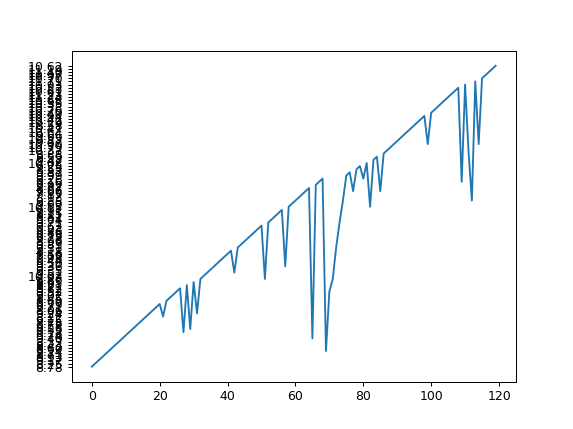

In [36]:


# Set x axis to numerical value for month
x_axis_data = np.arange(0,120,1)
x_axis_data

#array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# Average weather temp
points = format_list

# Plot the line
plt.plot(x_axis_data, points)
plt.show()

In [26]:
# Convert to Celsius C = (F-32) * 0.56
points_C = [(x-32) * 0.56 for x in points]
points_C

[-13.003200000000001,
 -13.3056,
 -12.790400000000002,
 -12.919200000000002,
 -13.0424,
 -12.8016,
 -13.104000000000001,
 -13.199200000000001,
 -13.2664,
 -12.661600000000002,
 -12.471200000000001,
 -12.7848]

In [27]:
# Plot using Celsius plt.plot(x_axis_data, points_C) plt.show()

# Plot both on the same chart plt.plot(x_axis_data, points) plt.plot(x_axis_data, points_C) plt.show()